In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ricerca Commenti Questionario 

In questo notebook vado a fare un po' di testing e di esperimenti per cercare quelli che sono i possibili commenti rappresentativi del mio dataset per poi somministrarli agli utenti come questionario valutazione tossicità. 

PASSAGGI
- devo individuare quelle che sono le caratteristiche comuni di diverse categorie di commenti (che siano facilmente interpretabili anche solo leggendo)
- devo estrarre circa un 1000 commenti in generale, quindi se trovo circa 5 categorie (1 non tossico - 4 tossiche), otterrò 200 commenti per ciascuna categoria 

In [2]:
# leggo copia per effettuare le analisi
df = pd.read_csv("./preprocessing_comments.csv")

/var/folders/4f/cb0dqlms1859gtsp67tk8_8m0000gn/T/ipykernel_67420/4292942664.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./preprocessing_comments.csv")


In [3]:
df.columns, df.dtypes

(Index(['author', 'text', 'subreddit', 'time', 'score', 'gildings', 'awardings',
        'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult',
        'identity_attack'],
       dtype='object'),
 author              object
 text                object
 subreddit           object
 time               float64
 score               object
 gildings            object
 awardings           object
 toxicity           float64
 severe_toxicity    float64
 obscene            float64
 threat             float64
 insult             float64
 identity_attack    float64
 dtype: object)

- author --> rappresenta autore
- text --> il testo del commento

- time --> numero di secondi trascorsi dal 1 gennaio 1970 (Epoch Unix)
- subreddit --> Ogni subreddit è dedicato a un argomento specifico e agisce come una comunità focalizzata su quel tema. Ogni subreddit ha una propria "identità" e può essere pubblico o privato.

- score --> punteggio del post dato dagli utenti like-dislike

- toxicity --> lo score generale di tossicità

- gildings, awardings --> entrambi sembrano essere sempre a [], {} quindi vuoti

In [4]:
df.head()

,author,text,subreddit,time,score,gildings,awardings,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,t2_czhecw0,And is it a large majority here or a vocal min...,modernwarfare,1.585699e+09,-6,{},[],0.031639,0.000137,0.001195,0.000268,0.000971,0.000513
1,t2_4d3o9,"The comment you went all ""RAAWR SOCIALISM"" was...",worldnews,1.585699e+09,9,{},[],0.927993,0.020693,0.876363,0.001828,0.216713,0.005582
2,t2_da02p,"apparently, he can’t kill or stop him in jail.",betterCallSaul,1.585699e+09,1,{},[],0.407492,0.003091,0.008701,0.102931,0.007755,0.008533
3,t2_cmz0u,or a yuumi/nami/lulu/zilean/ any enhancer play...,leagueoflegends,1.585699e+09,9,{},[],0.000914,0.000107,0.000176,0.000119,0.000206,0.000142
4,t2_1abt0emd,They argue that it's actually the Nazis dumpin...,AgainstDegenerateSubs,1.585699e+09,8,{},[],0.002129,0.000096,0.000174,0.000121,0.000231,0.000224


### elimino le colonne che non mi serviranno al fine di ottenere i commenti rappresentativi

In [5]:
df = df.drop(columns=["time", "gildings","awardings", "subreddit", "score"])

In [6]:
df.columns

Index(['author', 'text', 'toxicity', 'severe_toxicity', 'obscene', 'threat',
       'insult', 'identity_attack'],
      dtype='object')

In [7]:
df.head()

,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,t2_czhecw0,And is it a large majority here or a vocal min...,0.031639,0.000137,0.001195,0.000268,0.000971,0.000513
1,t2_4d3o9,"The comment you went all ""RAAWR SOCIALISM"" was...",0.927993,0.020693,0.876363,0.001828,0.216713,0.005582
2,t2_da02p,"apparently, he can’t kill or stop him in jail.",0.407492,0.003091,0.008701,0.102931,0.007755,0.008533
3,t2_cmz0u,or a yuumi/nami/lulu/zilean/ any enhancer play...,0.000914,0.000107,0.000176,0.000119,0.000206,0.000142
4,t2_1abt0emd,They argue that it's actually the Nazis dumpin...,0.002129,0.000096,0.000174,0.000121,0.000231,0.000224


In [8]:
original_count = len(df)

# rimuovo i righe che sono nan e che sono vuote
df = df[~df['text'].isna()]
df = df[df['text'].str.strip() != '']

removed_count = original_count - len(df)
'Righe eliminate:', removed_count


('Righe eliminate:', 95)

In [9]:
len(df)

8766502

### Ricerca tossicità

Colonna author non è adatta per un istogramma.
Colonna text non è adatta per un istogramma.


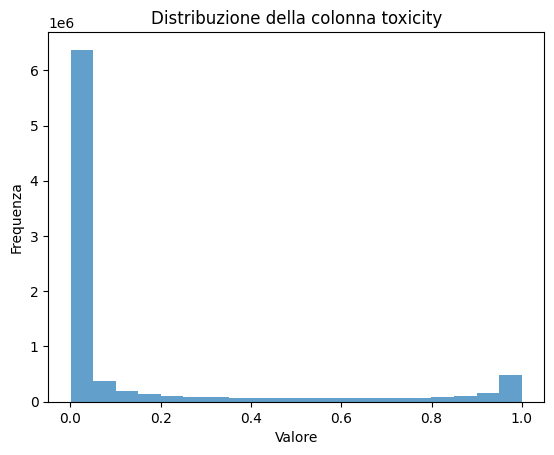

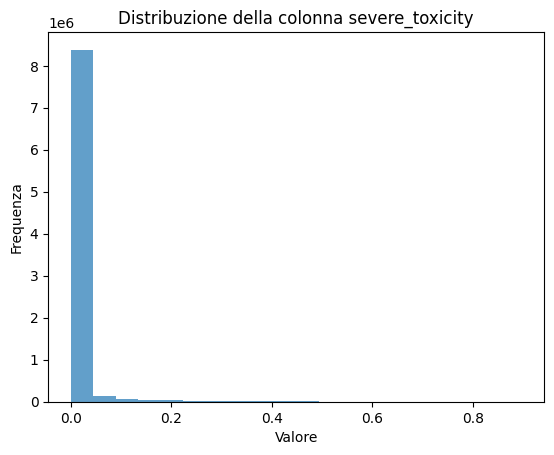

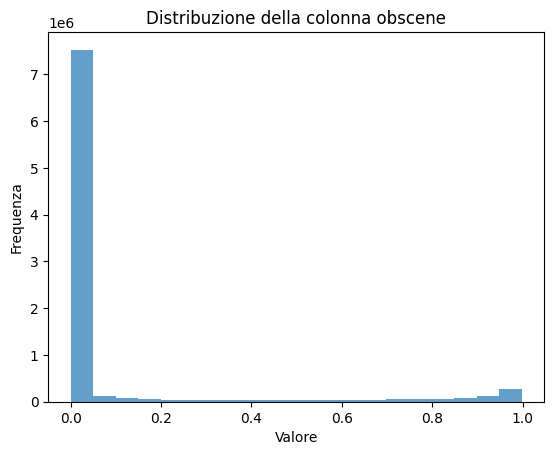

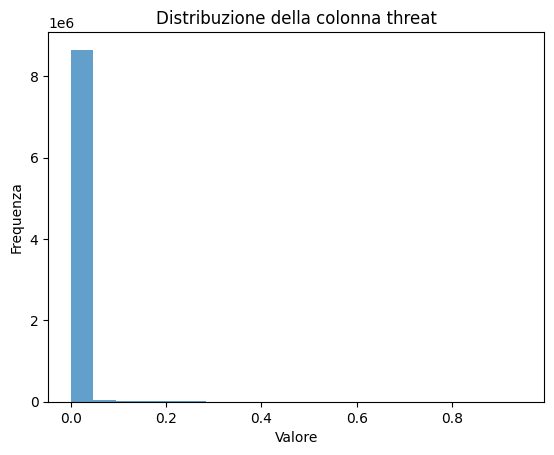

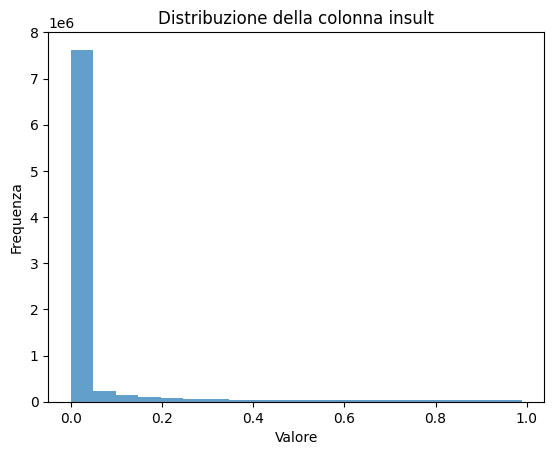

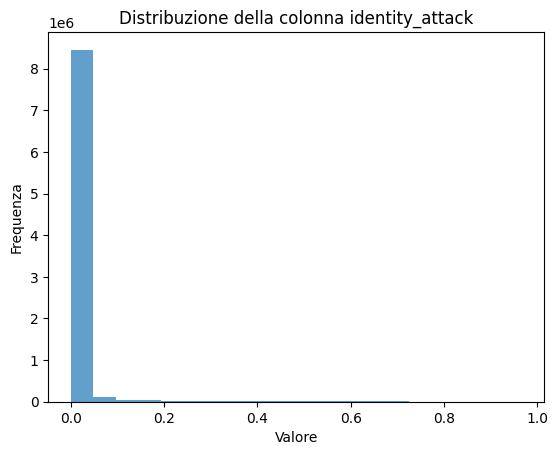

In [10]:
for i in df.columns:
    try:
        df[i].plot(kind='hist', bins=20, alpha=0.7)
        plt.title(f'Distribuzione della colonna ' + i) 
        plt.xlabel('Valore') 
        plt.ylabel('Frequenza') 
        plt.show()  
    except TypeError:
        print(f"Colonna {i} non è adatta per un istogramma.") 

Mi concentro sulla colonna 'toxicity' e filtro le righe 

- NON TOSSICO: tra 0 e 0.45
- POCO TOSSICO:  tra 0.45 a 0.7
- TOSSICO: tra 0.7 a 0.85
- MOLTO TOSSICO: tra 0.85 e 1

In [11]:
# NON TOSSICO: tra 0 e 0.45
non_toxic_df = df[(df['toxicity'] >= 0) & (df['toxicity'] <= 0.45)]
print("non_tossico: ", len(non_toxic_df))

# POCO TOSSICO: tra 0.45 e 0.7
poco_toxic_df = df[(df['toxicity'] > 0.45) & (df['toxicity'] <= 0.7)]
print("poco_tossico: ", len(poco_toxic_df))

# TOSSICO: tra 0.7 e 0.85
tossico_df = df[(df['toxicity'] > 0.7) & (df['toxicity'] <= 0.85)]
print("tossico_df: ", len(tossico_df))

# MOLTO TOSSICO: tra 0.85 e 1
molto_tossico_df = df[(df['toxicity'] > 0.85) & (df['toxicity'] <= 1)]
print("molto_tossico_df: ", len(molto_tossico_df)) 

non_tossico:  7498880
poco_tossico:  306285
tossico_df:  228246
molto_tossico_df:  733090


Adesso vado a definirmi le diverse categorie che possono avere.

Avrei potuto utilizzare un algoritmmo di clustering per vedere quali fossro le classi presenti all'interno, ma essendo che devono essere ben comprensibili e riconoscibili per via del sondaggio, meglio se la scelta viene fatta a ragionamento:

- NON TOSSICO: non_toxic_df

- TOSSICO:
    - RACISM: molto_tossico_df + identity_attack
    - HARASSEMENT: molto_tossico_df + insult
    - VULGARITY: molto_tossico_df + obscene
    - VIOLENCE: molto_tossico_df + threat

Per il TOSSICO, ho scelto di prendere tutti i valori di tossico_df (228246) + molto_tossico_df (733090) in modo da avere un numero maggiore di campioni e una chiara evidenza di tossicità.

In [12]:
# Prendo come nuovo tossico solo quelli che sono maggiori di 0.7 per essere tossici e molto tossici

# Concateniamo i due DataFrame e rimuoviamo i duplicati
toxic_combined_df = pd.concat([tossico_df, molto_tossico_df], ignore_index=True)
print("molto_tossico_df: ", len(toxic_combined_df))

# ho controllato e i valori tornano facendo la somma di tossico+molto tossico

molto_tossico_df:  961336


In [13]:
#Prendo i commenti che hanno come THR un 0.5 di tossicità 

# RACISM
racism_df = toxic_combined_df[toxic_combined_df['identity_attack'] > 0.5]
print(f"Racism: {len(racism_df)}")

# HARASSMENT
harassment_df = toxic_combined_df[toxic_combined_df['insult'] > 0.5]
print(f"Harassment: {len(harassment_df)}")

# VULGARITY
vulgarity_df = toxic_combined_df[toxic_combined_df['obscene'] > 0.5]
print(f"Vulgarity: {len(vulgarity_df)}")

# VIOLENCE
violence_df = toxic_combined_df[toxic_combined_df['threat'] > 0.5]
print(f"Violence: {len(violence_df)}")

Racism: 42788
Harassment: 347223
Vulgarity: 734902
Violence: 17234


In [14]:
# Seleziona i primi 200 record da ogni categoria
non_toxic_sample = non_toxic_df.head(200)
racism_sample_1 = racism_df.head(200)
harassment_sample_1 = harassment_df.head(200)
vulgarity_sample_1 = vulgarity_df.head(200)
violence_sample_1 = violence_df.head(200)

display(non_toxic_sample)
display(racism_sample_1)
display(harassment_sample_1)
display(vulgarity_sample_1)
display(violence_sample_1)

,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,t2_czhecw0,And is it a large majority here or a vocal min...,0.031639,0.000137,0.001195,0.000268,0.000971,0.000513
2,t2_da02p,"apparently, he can’t kill or stop him in jail.",0.407492,0.003091,0.008701,0.102931,0.007755,0.008533
3,t2_cmz0u,or a yuumi/nami/lulu/zilean/ any enhancer play...,0.000914,0.000107,0.000176,0.000119,0.000206,0.000142
4,t2_1abt0emd,They argue that it's actually the Nazis dumpin...,0.002129,0.000096,0.000174,0.000121,0.000231,0.000224
5,t2_522ulxw3,Id say his ability to crash the game was OP,0.007628,0.000092,0.000569,0.000129,0.000401,0.000167
...,...,...,...,...,...,...,...,...
244,t2_3wn0v233,Also Sterilization Virus is unlikely to work. ...,0.001691,0.000111,0.000209,0.000154,0.000228,0.000196
245,t2_13lene,Awwww did your fragile feelings get hurt? Lmfao,0.047235,0.000122,0.000959,0.000290,0.001373,0.000346
246,t2_6m3iz,The Kurds have many factions across many count...,0.001826,0.000158,0.000311,0.000247,0.000226,0.000309
248,t2_hs4y1,Right. I recall that now.,0.000594,0.000129,0.000198,0.000121,0.000179,0.000141


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
71,t2_retnds8,This applies to really fat single people too!,0.785670,0.013801,0.078698,0.003610,0.252800,0.506426
169,t2_yx66g,&gt;However I will admit me having Ashkenazi b...,0.771603,0.028981,0.257035,0.021274,0.267949,0.567285
173,t2_4lbhb1nn,White people are pretty rad.,0.735355,0.019016,0.106146,0.007153,0.191850,0.602485
209,t2_j798a,"Don't forget, ""Arabs send their kids to die be...",0.810801,0.025730,0.062758,0.137268,0.099645,0.591374
291,t2_fpbzv,They test all the blood before it goes to anyo...,0.838803,0.019221,0.098608,0.019786,0.099548,0.550569
...,...,...,...,...,...,...,...,...
13006,t2_pzhta,Those Rich Asian Californian Rednecks,0.726088,0.026485,0.150350,0.007608,0.226078,0.585617
13125,t2_3ocbtxaf,Based but flair up nigga,0.797114,0.043554,0.251821,0.007164,0.326980,0.671739
13223,t2_ji5z3vp,Imagine if a gay couple sent this out. People ...,0.818946,0.017622,0.147178,0.005797,0.290967,0.521595
13524,t2_3zbrn4kr,"It's never clear exactly how they're ""differen...",0.714768,0.024546,0.165910,0.006433,0.307601,0.606464


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,t2_2v2z60bl,"""))))) idiot noob""\n*Fires spitfire behind A-W...",0.792792,0.004972,0.286667,0.000744,0.507184,0.014674
19,t2_3yp9hfaa,OP is a commie shill,0.841925,0.008665,0.496322,0.000953,0.559787,0.012308
22,t2_1p59uy6a,AND this proves how smart he is dipshits,0.727111,0.013330,0.564476,0.002339,0.534949,0.033914
30,t2_2r7om8ma,GTFO! Nuggets don’t equate to balls.,0.811609,0.026060,0.582319,0.006236,0.524581,0.159949
38,t2_uarnodl,Good. Loved how he tried being all whiny sayin...,0.724461,0.010958,0.556748,0.001595,0.547771,0.017932
...,...,...,...,...,...,...,...,...
2182,t2_91rpk,"Uh oh, are you a Trumptard who is delusional e...",0.794486,0.003837,0.158260,0.001106,0.646191,0.015941
2188,t2_9aqgixt,"Nah, but you did win the cunt of the year award!",0.721667,0.018114,0.681339,0.002062,0.608576,0.022482
2192,t2_ddkj6,Nah bro ur a layabout and a sponge.,0.794865,0.006550,0.403513,0.000748,0.504847,0.012165
2194,t2_3hrvqfor,They are still too dumb to have figured it out...,0.731706,0.007611,0.297152,0.001698,0.571925,0.036839


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
1,t2_1404lj,Yeah it's disgusting how porn companies knowin...,0.835649,0.012348,0.575184,0.004056,0.164129,0.033254
9,t2_3pimwkxy,Well first off the spear sucks and that is jus...,0.768473,0.004554,0.571078,0.000825,0.164031,0.002080
11,t2_1324kj,"does his 1 rep max without a spotter, no safet...",0.831463,0.006847,0.674766,0.000892,0.090071,0.002128
18,t2_gwbzhpg,DNC &amp; establishment media has tried really...,0.823912,0.012939,0.837963,0.001337,0.092903,0.002880
20,t2_zfjc2,Good god that last video came up in my recomme...,0.759494,0.010734,0.768510,0.001457,0.028452,0.001471
...,...,...,...,...,...,...,...,...
468,t2_4s3w55sw,This is big moment in 7.2 ownership history wh...,0.811307,0.009257,0.718308,0.001278,0.294715,0.005031
471,t2_2tsv2me8,"granted, the special edition sucks at any reso...",0.847608,0.006488,0.664833,0.000736,0.051919,0.001120
472,t2_13lene,&gt; Seems pretty cool to me. If anything he l...,0.700502,0.008677,0.555953,0.001778,0.435715,0.012946
473,t2_13yi23,Screenshot he posted looks like some tryhard M...,0.785965,0.008676,0.691532,0.001250,0.267875,0.005728


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
5,t2_1f15h5av,kill bolsonaro,0.801104,0.033235,0.030982,0.656421,0.033708,0.033277
14,t2_zxr1f,If he ever flossed he’d bleed to death.,0.798022,0.040400,0.033347,0.745264,0.046756,0.032304
68,t2_nh7ud,"Well, if we believe you guys they won’t need t...",0.795969,0.033128,0.024998,0.732019,0.057393,0.042508
86,t2_2ltzrdmv,they have a plan to kill everyone they meet,0.731374,0.026104,0.015661,0.602453,0.026003,0.034957
116,t2_8ohho,So close to the perfect death,0.711449,0.018452,0.020114,0.527016,0.026274,0.010749
...,...,...,...,...,...,...,...,...
9921,t2_2jf0dfqw,"In my future, I’ll be dancing on your grave.",0.759371,0.019779,0.022085,0.627312,0.042506,0.021117
10130,t2_4pvccdnc,I'm gonna kill myself,0.827856,0.061480,0.051058,0.760466,0.047837,0.024311
10137,t2_3qmouw88,I'd impale her with my sword,0.750134,0.049827,0.028688,0.745154,0.033356,0.026862
10145,t2_gswyd,If you drink too much water you will die. I be...,0.835100,0.037729,0.028588,0.701285,0.061125,0.060740


In [15]:
# voglio metterli in ordine di tossicità e di relativa categoria 

racism_df = toxic_combined_df[toxic_combined_df['identity_attack'] > 0.5].sort_values(by=['identity_attack', 'toxicity'], ascending=True)
print(f"Racism: {len(racism_df)}")

# HARASSMENT
harassment_df = toxic_combined_df[toxic_combined_df['insult'] > 0.5].sort_values(by=['insult', 'toxicity'], ascending=True)
print(f"Harassment: {len(harassment_df)}")

# VULGARITY
vulgarity_df = toxic_combined_df[toxic_combined_df['obscene'] > 0.5].sort_values(by=['obscene', 'toxicity'], ascending=True)
print(f"Vulgarity: {len(vulgarity_df)}")

# VIOLENCE
violence_df = toxic_combined_df[toxic_combined_df['threat'] > 0.5].sort_values(by=['threat', 'toxicity'], ascending=True)
print(f"Violence: {len(violence_df)}")


# Seleziona i primi 200 record da ogni categoria
racism_sample_2 = racism_df.head(200)
harassment_sample_2 = harassment_df.head(200)
vulgarity_sample_2 = vulgarity_df.head(200)
violence_sample_2 = violence_df.head(200)

display(racism_sample_2)
display(harassment_sample_2)
display(vulgarity_sample_2)
display(violence_sample_2)

Racism: 42788
Harassment: 347223
Vulgarity: 734902
Violence: 17234


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
364502,t2_qs07u,"Kitten, if you and u/Duunadain don't think a g...",0.866865,0.047186,0.572666,0.011918,0.567250,0.500013
504457,t2_4tzfn,How does it breed racism? Is it because gettin...,0.982072,0.136542,0.899055,0.037168,0.718240,0.500031
894163,t2_38zvnqyo,Fascist pig.,0.974289,0.053216,0.630160,0.005041,0.802357,0.500033
30256,t2_xtuyp,Wasn’t Sparta also really gay? And spartan wom...,0.788311,0.016300,0.111901,0.005731,0.182650,0.500038
912153,t2_k9lp2,unclear to me because the confederacy fucking ...,0.990847,0.260301,0.968292,0.018071,0.688504,0.500039
...,...,...,...,...,...,...,...,...
898439,t2_3hslj4jz,"Not even the gay spaces are safe smh, turns ou...",0.942343,0.071818,0.753633,0.008451,0.683361,0.501327
413098,t2_b28qfvs,Agreed. There are a lot of racist ass backward...,0.873616,0.039699,0.535689,0.008139,0.445763,0.501327
213179,t2_2cow309q,Transphobia is quite explicitly denying the ex...,0.767426,0.011751,0.043000,0.005148,0.152088,0.501338
249902,t2_3yp9hfaa,God Asian supremacists are cringe,0.908325,0.018535,0.129995,0.006605,0.255652,0.501339


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
109809,t2_pgpk7,Mostly it was the idiot I was talking to not u...,0.762887,0.003480,0.280793,0.000411,0.500002,0.002705
281938,t2_rw07l,"No point in arguing with you, you are just bla...",0.950579,0.014222,0.786832,0.000983,0.500003,0.003021
563326,t2_f7tzi,The police don't just fucking come and beat pe...,0.995213,0.190975,0.971708,0.099605,0.500005,0.020151
725926,t2_7v65g,"That sun is like the 1%, most times my baby ju...",0.990329,0.085490,0.962912,0.002350,0.500006,0.004388
617066,t2_1ztu9smd,"Most of these ""protestors"" engage in rioting a...",0.990680,0.091500,0.892640,0.071307,0.500007,0.043481
...,...,...,...,...,...,...,...,...
409449,t2_2qjmcs9w,Never give those fucks access to your finances,0.995505,0.173001,0.976859,0.004813,0.500295,0.003439
149375,t2_okljeeu,It was compelling argument for dumb people.,0.789926,0.004862,0.064320,0.001383,0.500298,0.099651
805191,t2_4dhn0b8d,She needs to shove at least 10 in her mouth to...,0.981107,0.038033,0.908634,0.001551,0.500298,0.003980
883890,t2_j1vhg,"So make him reject it. Pass the Trump bill, bl...",0.962451,0.030030,0.862112,0.007730,0.500299,0.010344


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
927544,t2_3h8061m1,Screw him. Going out like this,0.887939,0.004847,0.500001,0.000544,0.103600,0.001295
77543,t2_8c06947,"Strawman, your argument literaly not exist bec...",0.781480,0.007956,0.500002,0.003716,0.211420,0.035641
181860,t2_4gwc5gri,Masturbating to relieve stress/anxiety is bad ...,0.701025,0.008818,0.500004,0.011089,0.125631,0.009645
169841,t2_4b262,I don't have the energy to read that word vomi...,0.721781,0.008644,0.500004,0.002477,0.415716,0.019574
196630,t2_b302d,&gt; Manchin is the only Dem who can win state...,0.710500,0.009733,0.500004,0.003884,0.170655,0.051113
...,...,...,...,...,...,...,...,...
741971,t2_le5mh,That's what he said. Idiot liberals.,0.979758,0.033494,0.500614,0.002959,0.831758,0.366116
69646,t2_8lbqd,&gt;You smell the smoke every once in a while ...,0.724865,0.003992,0.500615,0.001275,0.069718,0.002662
87455,t2_94cgv,"ok - downvote - me - all - you - want, - but -...",0.769725,0.004279,0.500618,0.001339,0.083747,0.001783
216932,t2_3u98cae7,"ok? you're straight, so you can't really decid...",0.800591,0.017299,0.500620,0.006278,0.373127,0.177568


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
888824,t2_2e02foli,"I gotta say, fuck this judge and he absolutely...",0.994943,0.322639,0.961104,0.500006,0.724691,0.027674
857686,t2_182yij7r,I'm fucking glad the zombies ripped his ass to...,0.997415,0.514908,0.984653,0.500013,0.833267,0.071546
913517,t2_2qjmcs9w,She would be alive had her boyfriend not got i...,0.965009,0.059457,0.593486,0.500044,0.319476,0.020870
788095,t2_5jq1unf,Oh boo hoo I'm the president I don't have a wa...,0.995368,0.293850,0.945445,0.500062,0.879764,0.104994
98841,t2_7v1vb,world burn,0.811211,0.025787,0.024551,0.500080,0.026166,0.015114
...,...,...,...,...,...,...,...,...
366899,t2_9zin5,My congenitals affect your mom's neck,0.934944,0.031751,0.115825,0.503030,0.159852,0.011931
209972,t2_vjdv4d7,“I’m gonna blow up this monster mash.”,0.775531,0.021403,0.037730,0.503052,0.027386,0.008281
171521,t2_bbp8f,All I got out of it was be paranoid because ev...,0.765854,0.015540,0.017847,0.503065,0.052719,0.014393
476491,t2_3bmmpdj2,"Damn, no mouth, starving to death, only had ab...",0.991571,0.160294,0.871430,0.503081,0.683862,0.029350


Ora faccio la prova prendendo quelli che sono davvero tanto tossici >85

In [16]:
racism_df = toxic_combined_df[toxic_combined_df['identity_attack'] > 0.85].sort_values(by=['identity_attack', 'toxicity'], ascending=True)
print(f"Racism: {len(racism_df)}")

# HARASSMENT
harassment_df = toxic_combined_df[toxic_combined_df['insult'] > 0.85].sort_values(by=['insult', 'toxicity'], ascending=True)
print(f"Harassment: {len(harassment_df)}")

# VULGARITY
vulgarity_df = toxic_combined_df[toxic_combined_df['obscene'] > 0.85].sort_values(by=['obscene', 'toxicity'], ascending=True)
print(f"Vulgarity: {len(vulgarity_df)}")

# VIOLENCE
violence_df = toxic_combined_df[toxic_combined_df['threat'] > 0.85].sort_values(by=['threat', 'toxicity'], ascending=True)
print(f"Violence: {len(violence_df)}")

# Seleziona i primi 200 record da ogni categoria
racism_sample_3 = racism_df.head(200)
harassment_sample_3 = harassment_df.head(200)
vulgarity_sample_3 = vulgarity_df.head(200)
violence_sample_3 = violence_df.head(200)

# Mostra i campioni di commenti delle diverse categorie
display(racism_sample_3)
display(harassment_sample_3)
display(vulgarity_sample_3)
display(violence_sample_3)

Racism: 2523
Harassment: 109695
Vulgarity: 460174
Violence: 739


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
519414,t2_feewj,God Americans need to get a fuckin hobby or so...,0.997417,0.476582,0.977965,0.032637,0.927032,0.850015
508548,t2_dfwiw,Kill all Asians. Kill all women...\nThey're a ...,0.983286,0.211723,0.475221,0.452005,0.573244,0.850033
932489,t2_308cjchs,I mean the test is pretty shit. You are gonna ...,0.990339,0.324528,0.903295,0.296568,0.806637,0.850043
880447,t2_167nko,"Fuckin ghetto culture, may god strike down on ...",0.998284,0.602168,0.986513,0.096854,0.934323,0.850046
734204,t2_3t3zc6s5,Feminists be like: ew old white men in politic...,0.995103,0.442168,0.955891,0.025481,0.890646,0.850109
...,...,...,...,...,...,...,...,...
398631,t2_y1ejhcp,shut up cum of israel,0.995471,0.330711,0.921623,0.031410,0.810112,0.854115
786311,t2_3e5r6emw,Shut up racist white supremacist cracker black...,0.985735,0.143184,0.552050,0.036179,0.641165,0.854126
637078,t2_bhzt0,They are homosexual extremists.,0.966277,0.074400,0.308827,0.019404,0.563793,0.854132
571624,t2_4bcf7vo1,"What about kicking a gay man in the head, knoc...",0.993017,0.405339,0.951113,0.232941,0.855214,0.854137


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
248330,t2_1nczk2cq,Man fuck anyone that is trying to defend or no...,0.997634,0.422856,0.984841,0.149680,0.850001,0.025499
246448,t2_5u7q1,"Coincidentally, I bet they also met the most a...",0.984100,0.061295,0.907218,0.001701,0.850001,0.025875
344800,t2_1ygrehby,"Ah, well he is a bastard then",0.955289,0.033500,0.840811,0.001170,0.850006,0.022062
350768,t2_e3b9c,What's that video of the cop shooting his own ...,0.996747,0.199372,0.983089,0.003330,0.850008,0.016771
573843,t2_3arqy2l4,"This wasn't a comparison to see who's better, ...",0.931827,0.013946,0.584384,0.000836,0.850011,0.009513
...,...,...,...,...,...,...,...,...
892626,t2_4amcj,"I dunno man, do you suck yourself off and then...",0.995451,0.126340,0.967697,0.002305,0.850274,0.007041
681925,t2_m8hiax4,"Drew is one person, I never supported attackin...",0.981908,0.070688,0.942400,0.001113,0.850274,0.009859
794272,t2_3jcww864,"I'm as left as they come, but Biden is such a ...",0.987702,0.118344,0.938708,0.006752,0.850279,0.242392
460655,t2_sbumm,Give me Aloy over those weird ass anime chicks...,0.994740,0.140857,0.957084,0.003636,0.850280,0.051613


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
646055,t2_x5vxw,shits heating up,0.962416,0.023252,0.850000,0.001746,0.102094,0.002049
260199,t2_3np19ytf,Mine stole my riven once.\n\nStopped what I wa...,0.979605,0.058724,0.850001,0.095476,0.660967,0.009350
654500,t2_62fiy,Weird ass European shit actually. While 90% o...,0.947079,0.033296,0.850001,0.003841,0.359652,0.058717
696617,t2_126woq,Half of them have been actively disproven and ...,0.918085,0.017696,0.850002,0.001384,0.264458,0.003514
257468,t2_6fh68,I have no idea if he's actually raped anyone a...,0.903210,0.052327,0.850003,0.011435,0.523526,0.139754
...,...,...,...,...,...,...,...,...
734672,t2_sshe5,1st time a private bizness man with a multi-mi...,0.902649,0.015870,0.850138,0.001252,0.130766,0.002774
489462,t2_9yzl9,About to drop a bomb ass single on a wedding a...,0.955039,0.027893,0.850138,0.004749,0.302142,0.006369
197439,t2_996j9,I guessed we would split a loss and a victory ...,0.837251,0.014618,0.850139,0.001626,0.054887,0.002044
424652,t2_1xz6xov4,I really wanna know what dickheads stopped the...,0.892226,0.064542,0.850140,0.011534,0.604699,0.175544


,author,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
616808,t2_9sdpg,Unfortunately that kid is probably going to go...,0.952508,0.099512,0.121424,0.850024,0.266411,0.065539
511223,t2_2t7vebsa,i'm gonna kick your son in the ribs.,0.891961,0.074008,0.095922,0.850048,0.119313,0.038965
878457,t2_42xfitqq,Lots of people should die.,0.933897,0.099295,0.076599,0.850079,0.152754,0.120246
407107,t2_4aqeh1qj,You’re just mad that oppressed peoples are sta...,0.953816,0.117993,0.096373,0.850118,0.316305,0.195631
477982,t2_25z2n57,Death to British rule 🇨🇳🇨🇳🇨🇳,0.910778,0.112162,0.064756,0.850123,0.110962,0.186661
...,...,...,...,...,...,...,...,...
702461,t2_4urtthwy,"When you raid: ""You're ugly, you're disgusting...",0.974503,0.158701,0.256175,0.861125,0.482367,0.058178
607756,t2_sshe5,They will kill you.,0.872931,0.099507,0.064102,0.861191,0.097890,0.058513
755690,t2_38eds98p,Bro your family deserves to be shot for messin...,0.939968,0.110438,0.102929,0.861204,0.205627,0.149940
647081,t2_19yfde08,Sign my petition or I'll follow you home and k...,0.901226,0.091019,0.077037,0.861254,0.136878,0.059095


In [18]:
# Salva i campioni in file CSV differenti
non_toxic_sample.to_csv('./questionario/non_toxic_sample.csv', index=False)
racism_sample_3.to_csv('./questionario/racism_sample.csv', index=False)
harassment_sample_3.to_csv('./questionario/harassment_sample.csv', index=False)
vulgarity_sample_3.to_csv('./questionario/vulgarity_sample.csv', index=False)
violence_sample_3.to_csv('./questionario/violence_sample.csv', index=False)